In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# conda install -c conda keras==2.1.2

In [6]:
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

Using TensorFlow backend.


In [7]:
folder = '/Users/julianganzabal/.kaggle/competitions/fashion-mnist-itba-lab-ml/'
x_test_ = np.load(folder+'test_images.npy')
y_test = np.loadtxt('test_labels.csv', delimiter=',', skiprows=1)
x_test = x_test_.reshape(x_test_.shape + (1,))
y_test_categorical = to_categorical(y_test[:,0])

In [ ]:
folder = '/Users/julianganzabal/.kaggle/competitions/fashion-mnist-itba-lab-ml/'
x = np.load(folder+'train_images.npy')
y = np.loadtxt(folder+'train_labels.csv', delimiter=',', skiprows=1)
x_test_ = np.load(folder+'test_images.npy')
y_test = np.loadtxt('test_labels.csv', delimiter=',', skiprows=1)
x_train_, x_valid_, y_train, y_valid = train_test_split(x, y, test_size = 0.1)

# Reshape para convolucionales

In [6]:
x_train = x_train_.reshape(x_train_.shape + (1,))
x_valid = x_valid_.reshape(x_valid_.shape + (1,))
x_test = x_test_.reshape(x_test_.shape + (1,))

In [16]:

y_train_categorical = to_categorical(y_train)
y_val_categorical = to_categorical(y_valid)
y_test_categorical = to_categorical(y_test[:,0])

NameError: name 'y_train' is not defined

In [1]:
from cnn_models import get_model, get_model_2, get_model_3, get_model_4, get_model_5

Using TensorFlow backend.


In [9]:
from keras import optimizers

In [10]:
adam = optimizers.Adam(lr=0.001, decay=0.00001) #decay=1e-4

In [11]:
model_1 = get_model()
model_1.compile(loss = 'categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
model_1.load_weights('cnn-1.hdf5')
model_1.evaluate(x_test, y_test_categorical)

10000/10000 [==============================] - 8s 834us/step


[0.21586907600164412, 0.92659999999999998]

In [12]:
model_2 = get_model_2()
model_2.compile(loss = 'categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
model_2.load_weights('cnn-2.hdf5')
model_2.evaluate(x_test, y_test_categorical)

10000/10000 [==============================] - 6s 619us/step


[0.21623372276425362, 0.92659999999999998]

In [5]:
model_3 = get_model_3(p=0.1)
model_3.load_weights('cnn-3-3.hdf5')
#model_3.summary()
#model_3.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_3.evaluate(x_test, y_test_categorical)

NameError: name 'x_test' is not defined

In [26]:
model_4 = get_model_5()
model_4.load_weights('cnn-4.hdf5')
#model_4.summary()
#model_4.compile(loss = 'categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
model_4.evaluate(x_test, y_test_categorical)

10000/10000 [==============================] - 15s 1ms/step


[0.18580493946671486, 0.93300000000000005]

In [ ]:
[0.18230716723501683, 0.93300000000000005]

In [26]:
from keras.callbacks import ModelCheckpoint 
#from keras.models import Sequential
#from keras.layers.normalization import BatchNormalization
#from keras import initializers
from fnn_helper import PlotLosses
#from keras.models import Sequential
#from keras.layers.core import Dense, Dropout, Activation, Flatten
#from keras.layers import Convolution2D, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization
#from keras.layers.normalization import BatchNormalization
#from keras import optimizers
#from keras.utils import np_utils

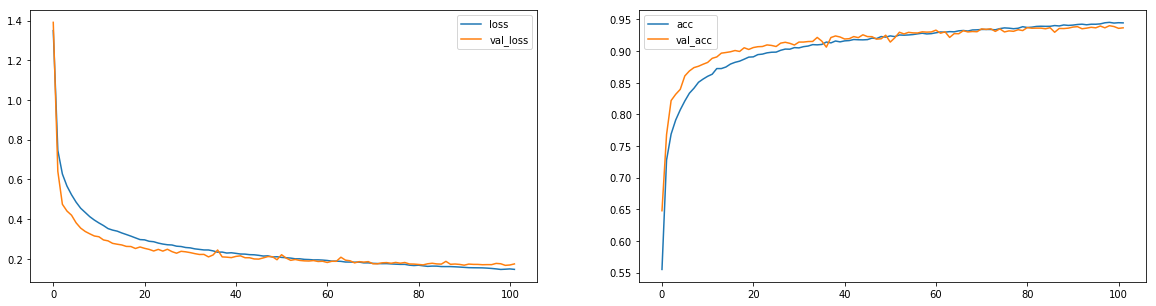

Epoch 00102: val_acc did not improve
54000/54000 [==============================] - 1271s 24ms/step - loss: 0.1472 - acc: 0.9446 - val_loss: 0.1747 - val_acc: 0.9368
Epoch 103/500
30976/54000 [================>.............] - ETA: 9:29 - loss: 0.1456 - acc: 0.9451

KeyboardInterrupt: 

In [27]:
model_4 = get_model_4()
adam = optimizers.Adam(lr=0.0001, decay=0.00001) #decay=1e-4
model_4.compile(loss = 'categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
plot_losses = PlotLosses(plot_interval=1, evaluate_interval=None, x_val=x_valid, y_val_categorical=y_val_categorical)
checkpointer = ModelCheckpoint(filepath='cnn-4.hdf5', monitor='val_acc', verbose=1, save_best_only=True)
model_4.fit(x_train, 
          y_train_categorical,
          epochs=500, batch_size=256, 
          #verbose=1, 
          validation_data=(x_valid, y_val_categorical), 
          callbacks=[plot_losses, checkpointer],
         )

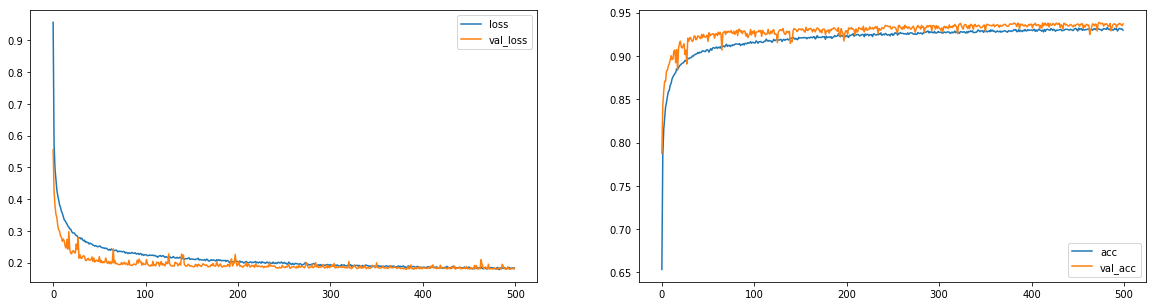


Epoch 00500: val_acc did not improve


In [31]:
plot_losses = PlotLosses(plot_interval=1, evaluate_interval=None, x_val=x_valid, y_val_categorical=y_val_categorical)
checkpointer = ModelCheckpoint(filepath='cnn.hdf5', monitor='val_acc', verbose=1, save_best_only=True)
model_3.fit(x_train, 
          y_train_categorical,
          epochs=500, batch_size=256, 
          #verbose=1, 
          validation_data=(x_valid, y_val_categorical), 
          callbacks=[plot_losses, checkpointer],
         )